# STAT207 Final Project - Heart Disease Classifier


Alejandra (aa94), Nathan (nparmer2), Shriya (shriyad2)

In [3]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Introduction

For our final project, we are examining a heart disease dataset to build a classifier that predicts whether someone has heart disease or not based on a few factors. Our primary research goal is to build a predictive model that will effectively predict heart disease in new datasets. For this project specifically, we are going to use five explanatory variables: BMI, smoking, physical health, sleep time, and alcohol drinking to predict heart disease. Based on these explanatory variables, our secondary research goal is to yield reliable interpretable insights about the nature between the variables (both explanatory and response) in our dataset. The motive that someone might have for wanting to build this model is to be able to improve our healthcare services and take more preventative measures for patients that are at risk or could be at risk of heart disease. By being able to predict the risk of heart disease or potential of heart disease within patients earlier, doctors could be able to treat the matter or be cautious of it before it becomes worse. Based on these motivations, doctors and scientists would find these predictive models useful since they could study how these risk factors contribute to the potential of heart disease and be able to take more preventative measures for their patients. As a result, this person would desire a classifier that was very accurate in predicting positives and a model that has a very low percentage of false negatives (there is greater harm if our model predicts that someone does not have heart disease when they do than if the model predicts that someone does have heart disease when they do not). 


One source that supports the argument that false negatives are more important to avoid than false positives is https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4389712/. Although this article mentions consequences of both false positives and false negatives, the consequences/impacts of false negatives outweigh the consequences/impacts of false positives. Being classified as not having a certain disease when they have the disease delays the process of a correct diagnosis. Delaying these results can delay early treatment, which lowers chances of recovery and increases risk of morbidity and mortality. Another source that supports this same logic is https://journalofethics.ama-assn.org/article/what-makes-screening-exam-good/2006-01. Sensitivity (leads to fewer false negative cases) is often increased at the expense of specificity (leads to fewer false positive cases) in cases where the disease is more curable or treatable when diagnosed earlier (as is the case with heart disease).

## 2. Dataset Discussion

In [4]:
heart_df = pd.read_csv("heart_2020_cleaned.csv")
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


heart_df is a dataset with 18 columns of various observations including the person's BMI, whether they smoke or not, whether they drink or not, and many more. 

In [5]:
heart_df.shape[0]

319795

This dataset has 319795 rows pre-cleaning. 

We received this dataset from Kaggle.com (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/) and we downloaded the csv file on November 13, 2023. The data for the dataset was collected from the CDC, as a part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. As a result, the rows in the dataset represent U.S. residents that participated in the telephone survey in 2020 from any of the 50 states, DC, or three U.S territories. The dataset does not include ALL types of observations that could have been considered in this dataset. Although they considered many health factors, there definitely are some more that they could've considered such as diving deeper into specific types of physical activity and considering height and weight. This impacts the types of actions that the person in my research motivation might take by either accounting for these factors in their later conclusions or by looking for more data or making data that includes these factors if they want to include them in their classifier/models.

The variable that we intend to use as our response variable is heart disease. In the dataset, this variable is a categorical variable with two levels which indicates whether the person has heart disease or not. Similarly, our classifier will predict whether a person has heart disease or not. 

The five explanatory variables that we have chosen are BMI, smoking, alcohol drinking, physical activity and sleep time. BMI is a numerical variable that shows a person's body mass index which is a person's weight divided by the square of a person's height. Smoking is a categorical variable with two levels that indicates whether a person smokes or not. Alcohol drinking is a categorical variable with two levels that indicates whether the person drinks alcohol frequently or not. Physical activity is another categorical variable with two levels that indicates whether the person engages in physical activity or not (it is not specified exactly what physical activity specifically entails, but we will regard it as engages in some sort of physical activity regularly). The last variable that we are examining is sleep time which is a numerical variable that indicates how many hours of sleep the person gets per night on average. 

We chose to focus on these five explanatory variables due to some prior knowledge that we have. In science classes, we have heard that engaging in smoking or frequent alcohol drinking and not engaging in regular physical activity can contribute to health risks later on in life such as heart disease. As a result, we want to examine whether this rings true by examining these factors that are provided in the dataset alongside variables such as BMI and sleep time to see if it's able to accurately predict whether a person has heart disease or not.

## 3. Dataset Cleaning

In [6]:
heart_df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Based on examining the data types of all the column variables, we can say that there are no implicit missing values for the numerical variables since they have all casted to float64s without any problems. Now, we will do further investigation for the categorical variables. 

In [7]:
heart_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Based on the sum of all null values in the dataset, we can also say that there are no explicit missing values within the dataset since there are no null values in any of the columns. As a result, we do not need to drop any rows in the dataset.

In [8]:
smoking_counts = heart_df["Smoking"].value_counts()
smoking_counts

No     187887
Yes    131908
Name: Smoking, dtype: int64

Within the categorical variable smoking, there are no levels that have few observations. We will not drop any levels here.

In [9]:
alcohol_counts = heart_df["AlcoholDrinking"].value_counts()
alcohol_counts

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

Within the categorical variable alcoholdrinking, although one level has significantly less amount of observations, there are still enough observations to warrant keeping the level. As a result, we will not drop any levels here either.

In [10]:
physical_counts = heart_df["PhysicalActivity"].value_counts()
physical_counts

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

Similar to alcoholdrinking, within the categorical variable physicalactivity, although one level has significantly less amount of observations, there are still enough observations to warrant keeping the level. As a result, we will not drop any levels here either.

<AxesSubplot: xlabel='BMI', ylabel='SleepTime'>

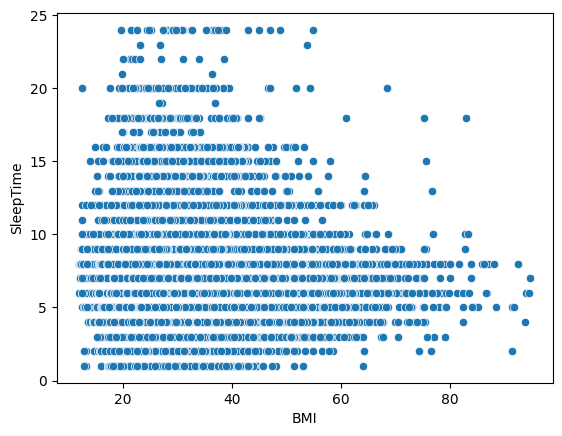

In [11]:
sns.scatterplot(x = "BMI", y = "SleepTime", data = heart_df)

There does not seem to be any significant outliers in the scatterplot between BMI and SleepTime. There are definitely a few values that do not fit the general trend such as the observation with a BMI of approximately 65 and SleepTime of 20, but these are not extreme enough to warrant dropping. One pro of dropping these outliers are that our end model would follow more of the general trend of the data. On the other hand, some cons of dropping these outliers are that our end model would be less likely to predict points with these more extreme values and wouldn't account for as much variability in data. We will decide to keep these outliers in our data since we want our model to account for variability in the data.

We did not discover any other data cleaning ideas. Since there were no implicit or explicit null values, as well as no extreme outliers or low observations in any of our categorical variables (largely since there are only two levels in all the categorical explanatory variables that we are studying), there is not much else to do to clean our data. One thing we could have looked at is the uncommon values of sleeptime that range beyond 12-15 hours.

## 4. Preliminary Analysis

<AxesSubplot: xlabel='Smoking'>

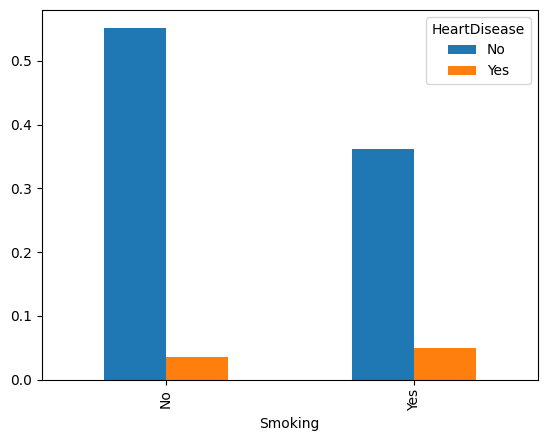

In [12]:
smoking_cross = pd.crosstab(heart_df["Smoking"], heart_df["HeartDisease"], normalize = True)
smoking_cross.plot.bar()

<AxesSubplot: xlabel='AlcoholDrinking'>

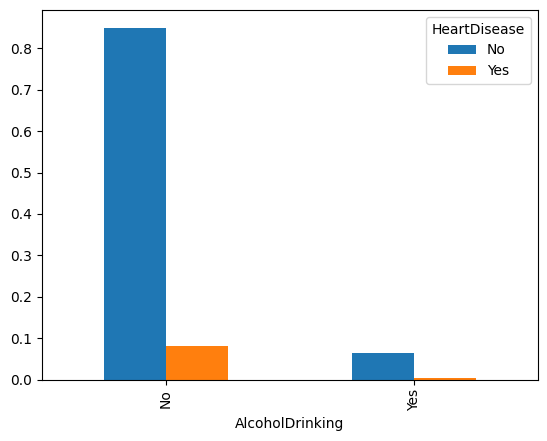

In [13]:
alcohol_cross = pd.crosstab(heart_df["AlcoholDrinking"], heart_df["HeartDisease"], normalize = True)
alcohol_cross.plot.bar()

<AxesSubplot: xlabel='PhysicalActivity'>

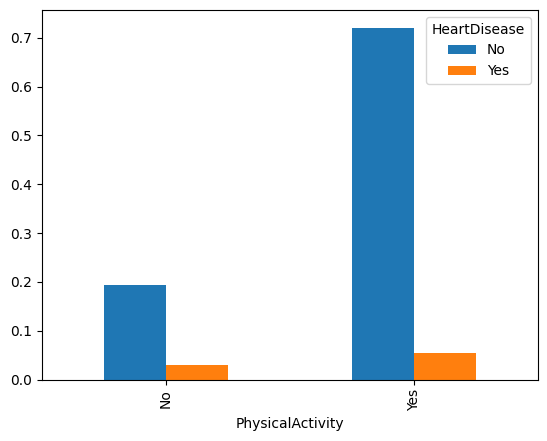

In [14]:
activity_cross = pd.crosstab(heart_df["PhysicalActivity"], heart_df["HeartDisease"], normalize = True)
activity_cross.plot.bar()

<AxesSubplot: xlabel='SleepTime', ylabel='HeartDisease'>

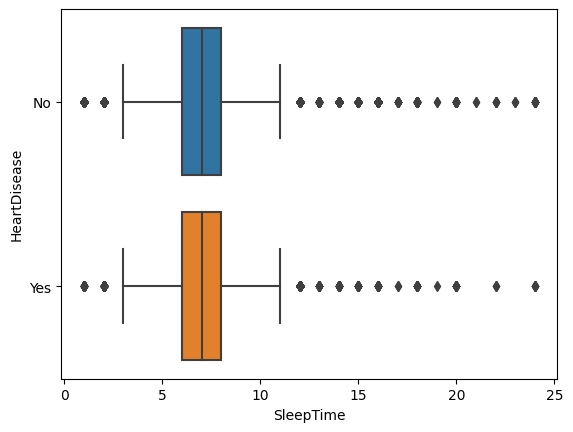

In [15]:
sns.boxplot(x = "SleepTime", y = "HeartDisease", data = heart_df)

<AxesSubplot: xlabel='BMI', ylabel='HeartDisease'>

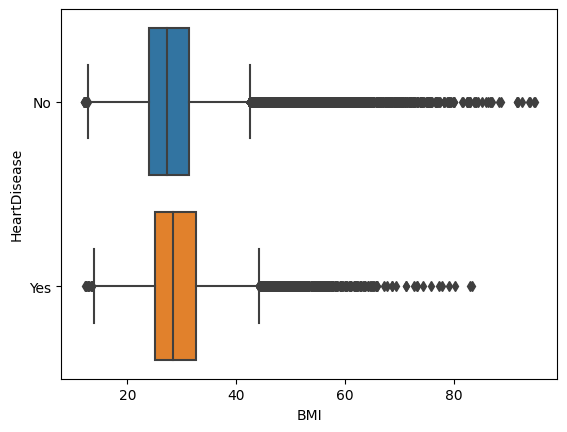

In [16]:
sns.boxplot(x = "BMI", y = "HeartDisease", data = heart_df)

PhysicalActivity and AlcoholDrinking seem to have the strongest relationships with the response variable. This is indicated since both colors have boxes of significantly different heights. SleepTime and BMI seem to have the weakest relationships with the response variable. This is indicated by the large amount of overlap between the boxplots and the similarities between the outliers.

<AxesSubplot: xlabel='BMI', ylabel='Smoking'>

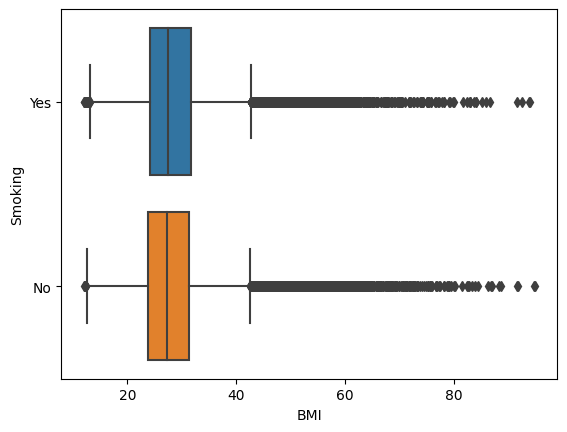

In [17]:
sns.boxplot(x = "BMI", y = "Smoking", data = heart_df)

<AxesSubplot: xlabel='SleepTime', ylabel='Smoking'>

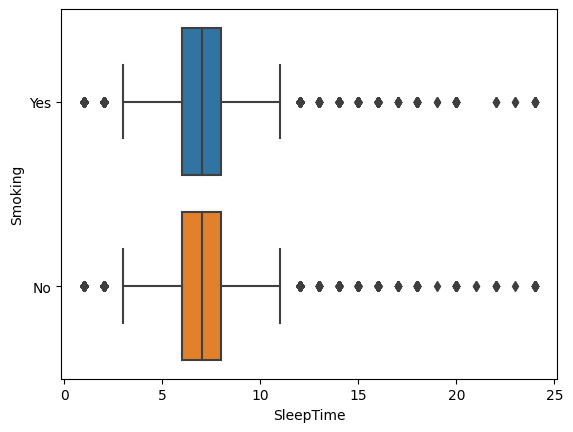

In [18]:
sns.boxplot(x = "SleepTime", y = "Smoking", data = heart_df)

<AxesSubplot: xlabel='Smoking'>

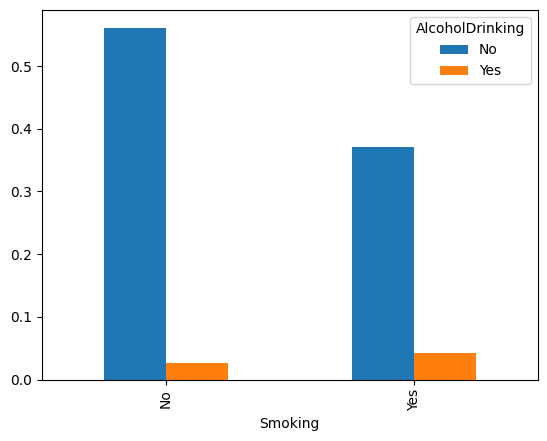

In [19]:
smoking_alc = pd.crosstab(heart_df["Smoking"], heart_df["AlcoholDrinking"], normalize = True)
smoking_alc.plot.bar()

<AxesSubplot: xlabel='Smoking'>

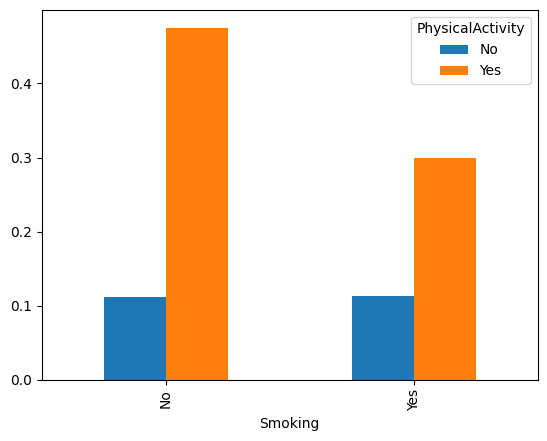

In [20]:
smoking_act = pd.crosstab(heart_df["Smoking"], heart_df["PhysicalActivity"], normalize = True)
smoking_act.plot.bar()

<AxesSubplot: xlabel='BMI', ylabel='AlcoholDrinking'>

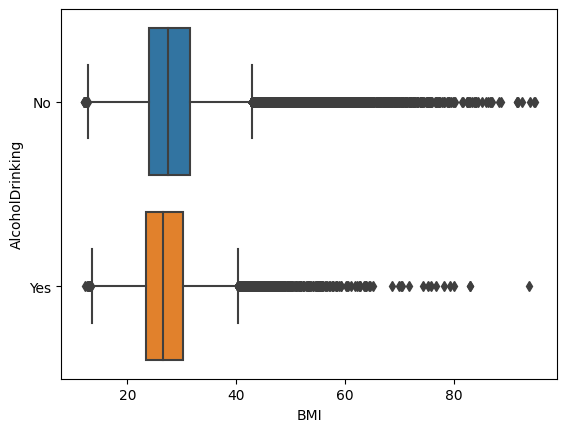

In [21]:
sns.boxplot(x = "BMI", y = "AlcoholDrinking", data = heart_df)

<AxesSubplot: xlabel='SleepTime', ylabel='AlcoholDrinking'>

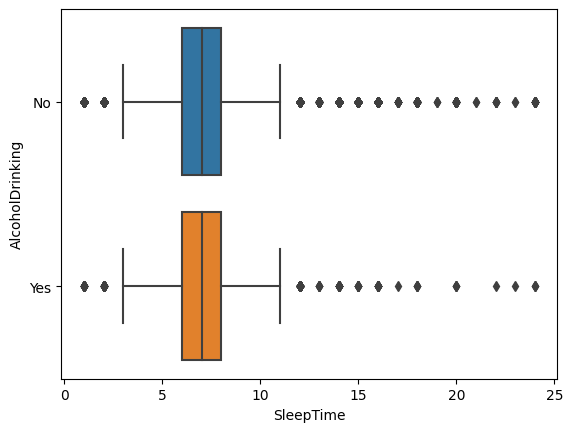

In [22]:
sns.boxplot(x = "SleepTime", y = "AlcoholDrinking", data = heart_df)

<AxesSubplot: xlabel='AlcoholDrinking'>

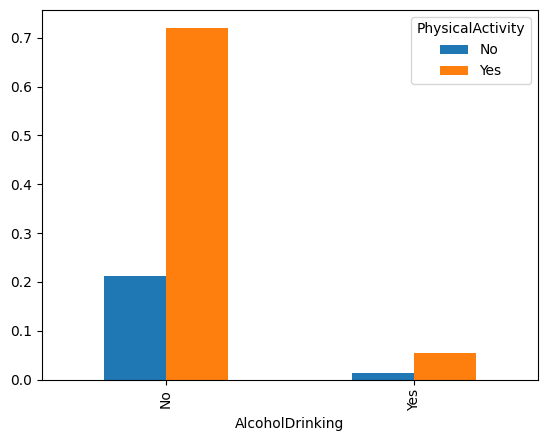

In [23]:
alc_act = pd.crosstab(heart_df["AlcoholDrinking"], heart_df["PhysicalActivity"], normalize = True)
alc_act.plot.bar()

<AxesSubplot: xlabel='BMI', ylabel='PhysicalActivity'>

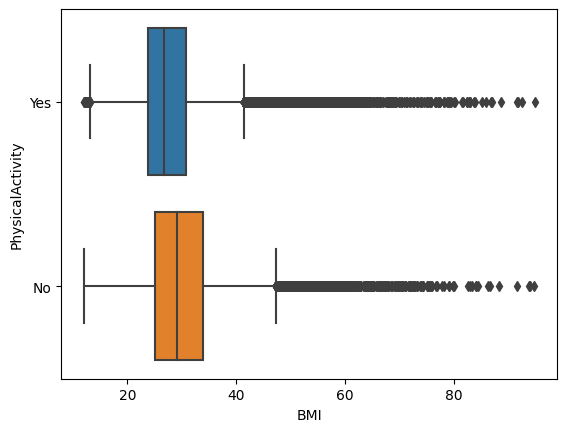

In [24]:
sns.boxplot(x = "BMI", y = "PhysicalActivity", data = heart_df)

<AxesSubplot: xlabel='SleepTime', ylabel='PhysicalActivity'>

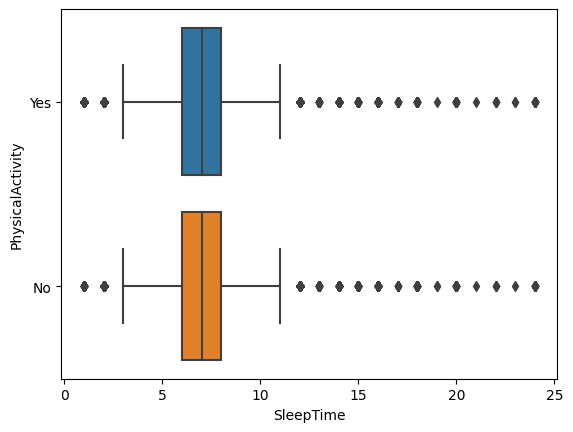

In [25]:
sns.boxplot(x = "SleepTime", y = "PhysicalActivity", data = heart_df)

,BMI,SleepTime
BMI,1.000000,-0.051822
SleepTime,-0.051822,1.000000


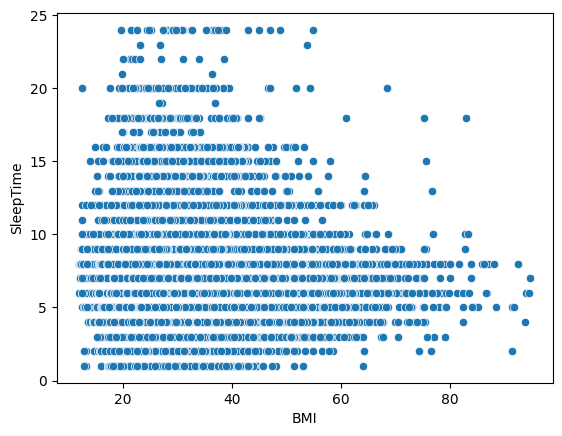

In [26]:
sns.scatterplot(x = "BMI", y = "SleepTime", data = heart_df)
heart_df[["BMI", "SleepTime"]].corr()

There are a three pairs of explanatory variables that seem to have strong relationships: smoking and alcoholdrinking, smoking and physicalactivity, and alcoholdrinking and physicalactivity. This is indicated since both colors have boxes of significantly different heights; this indicates a strong association.

<AxesSubplot: xlabel='BMI', ylabel='Smoking'>

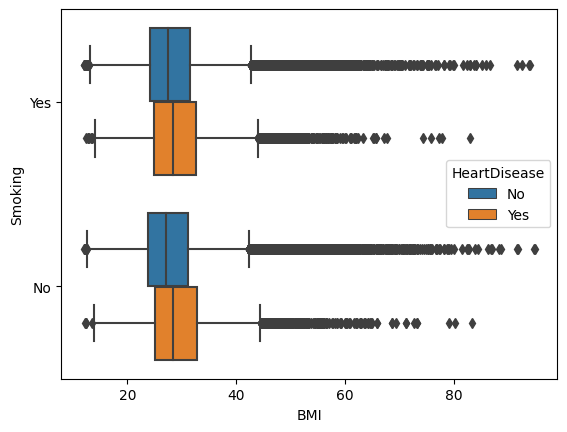

In [27]:
sns.boxplot(x = "BMI", y = "Smoking", hue = "HeartDisease", data = heart_df)

<AxesSubplot: xlabel='SleepTime', ylabel='Smoking'>

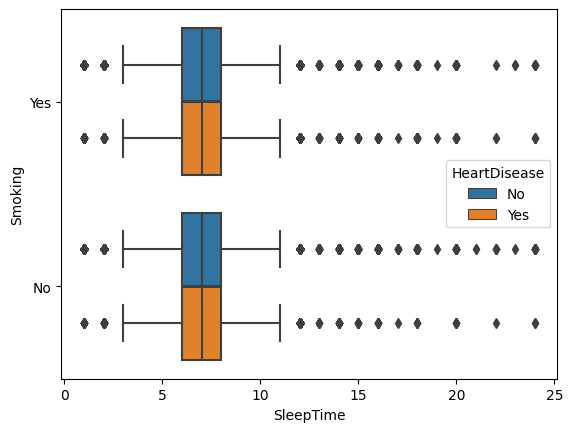

In [28]:
sns.boxplot(x = "SleepTime", y = "Smoking", hue = "HeartDisease", data = heart_df)

<AxesSubplot: xlabel='BMI', ylabel='AlcoholDrinking'>

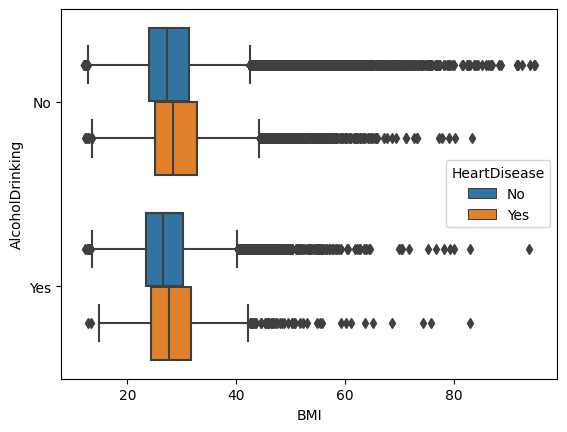

In [29]:
sns.boxplot(x = "BMI", y = "AlcoholDrinking", hue = "HeartDisease", data = heart_df)

<AxesSubplot: xlabel='SleepTime', ylabel='AlcoholDrinking'>

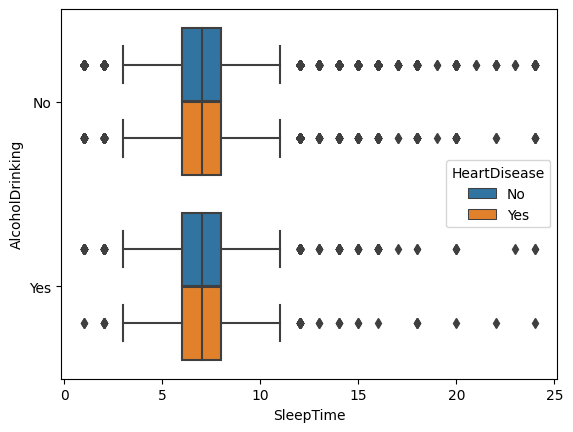

In [30]:
sns.boxplot(x = "SleepTime", y = "AlcoholDrinking", hue = "HeartDisease", data = heart_df)

<AxesSubplot: xlabel='BMI', ylabel='PhysicalActivity'>

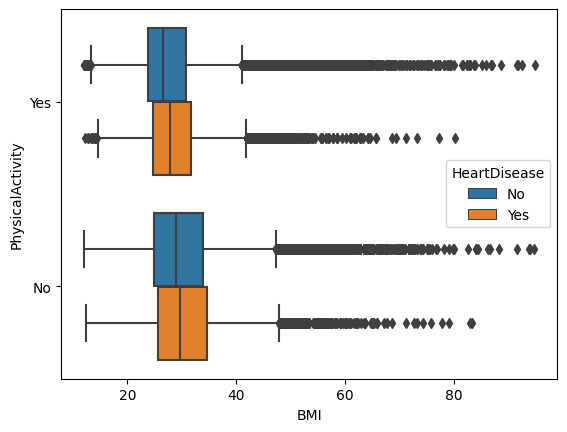

In [31]:
sns.boxplot(x = "BMI", y = "PhysicalActivity", hue = "HeartDisease", data = heart_df)

<AxesSubplot: xlabel='SleepTime', ylabel='PhysicalActivity'>

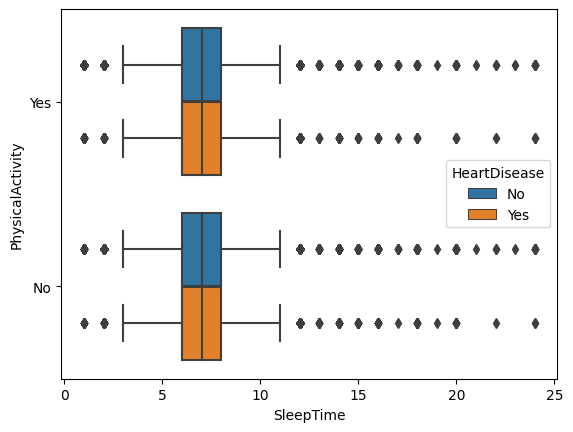

In [32]:
sns.boxplot(x = "SleepTime", y = "PhysicalActivity", hue = "HeartDisease", data = heart_df)

There does not seem to be an interaction in any pair of numerical and categorical explanatory variable in association with our response variable, heartdisease. This is demonstrated by the amount of overlap between the boxplots in every graph that we made. Since there is significant overlap, there is a weak association, indicating a lack of interaction between how any two explanatory variables impact our response variable.

## 5. Model Data Preprocessing

Before we continue, we must prepare our response and explanatory variables to be ready to train our models.

In [33]:
heart_df['has_heart_disease'] = heart_df['HeartDisease'].replace({'Yes': 1, 'No': 0})
heart_df['has_heart_disease'].head()

0    0
1    0
2    0
3    0
4    0
Name: has_heart_disease, dtype: int64

In [34]:
## Creates a features matrix and target array
x_full = heart_df.drop(['has_heart_disease'], axis=1)
y_full = heart_df['has_heart_disease']

In [35]:
## Because of our secondary research goal which focuses on model interpretability, we scaled our numerical explanatory variables
from sklearn.preprocessing import StandardScaler
scaler_training = StandardScaler()
scaled_exp_vars = scaler_training.fit_transform(x_full[['BMI', 'SleepTime']])
x_full[['BMI', 'SleepTime']] = scaled_exp_vars

In [36]:
## Translates the categorical explanatory variables into indicator variables
catdf = x_full[['Smoking', 'PhysicalActivity', 'AlcoholDrinking']]
numdf = x_full[['BMI', 'SleepTime']]
dummies = pd.get_dummies(catdf, drop_first=True, dtype=int)
x_full = pd.concat([numdf, dummies], axis=1).reset_index(drop=True)
x_full.head()

,BMI,SleepTime,Smoking_Yes,PhysicalActivity_Yes,AlcoholDrinking_Yes
0,-1.844750,-1.460354,1,1,0
1,-1.256338,-0.067601,0,1,0
2,-0.274603,0.628776,1,1,0
3,-0.647473,-0.763977,0,0,0
4,-0.726138,0.628776,0,1,0


Now that we havse scaled our numerical variables and created indicators for our categorical, we can continue with our k-Fold Cross-Validation

## 6. Feature Selection with k-Fold Cross-Validation

For the feature selection, LASSO logistic regularization will be used. This is because as previously seen, there is a weak association with the numerical and explanatory variables. Because we dont want to overfit our model, LASSO is the best model to use to penalize variables that do not bring enough predicitive power.

## First Model

In [37]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
list = []
k_fold = KFold(n_splits=5, shuffle=True, random_state=101)
for i in np.arange(0.001, 0.55, 0.005):
    lasso_modi= LogisticRegression(penalty='l1', C=1/i, solver='liblinear', max_iter=1000)
    test_fold_auc= cross_val_score(lasso_modi, x_full, y_full, cv=k_fold, scoring='roc_auc')
    list.append([i, test_fold_auc.mean()])
df_out = pd.DataFrame(list, columns=['alpha', 'auc'])
df_out.head()


,alpha,auc
0,0.001,0.650592
1,0.006,0.650592
2,0.011,0.650589
3,0.016,0.650591
4,0.021,0.650593


In [38]:
df_out.shape[0]

110

Confirmed we have at least 100 evenly spaced lambda values.

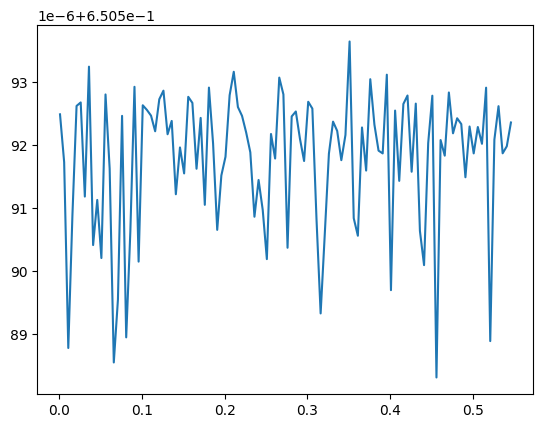

In [39]:
import matplotlib.pyplot as plt
plt.plot(df_out['alpha'].values, df_out['auc'].values)

There is no "peak" in the plot, rather there appears to be staying the same. Because of this, the next regulatization model will start from 0.55 until another number. This will be continued to hopefully find a "peak".

In [40]:
df_out.sort_values(by='auc', ascending=False)

,alpha,auc
70,0.351,0.650594
7,0.036,0.650593
42,0.211,0.650593
79,0.396,0.650593
53,0.266,0.650593
...,...,...
16,0.081,0.650589
104,0.521,0.650589
2,0.011,0.650589
13,0.066,0.650589


The  Lambda value that yielded the highest AUC is 0.65

## Model with Lambda of 0

In [41]:
lasso_mod0= LogisticRegression(penalty='l1', C=0.000001, solver='liblinear', max_iter=1000)

test_fold_auc0= cross_val_score(lasso_mod0, x_full, y_full, cv=k_fold, scoring='roc_auc')
test_fold_auc0.mean()

0.5

Out of curiosity, a lambda value close to 0 was done to see if our "peak" is at lambda 0. We see that this is not the case because our mean AUC is about 0.5 which is lower than our highest mean auc from before.

# Second Model

In [42]:
list1 = []
for i in np.arange(0.55, 1.05, 0.005):
    lasso_modi= LogisticRegression(penalty='l1', C=1/i, solver='liblinear', max_iter=1000)
    test_fold_auc= cross_val_score(lasso_modi, x_full, y_full, cv=k_fold, scoring='roc_auc')
    list1.append([i, test_fold_auc.mean()])
df_out1 = pd.DataFrame(list1, columns=['alpha', 'auc'])
df_out1.head()

,alpha,auc
0,0.550,0.650590
1,0.555,0.650592
2,0.560,0.650590
3,0.565,0.650592
4,0.570,0.650591


Another model was created but this time, starting at 0.55 and ending at 1.05

In [43]:
df_out1.shape[0]

100

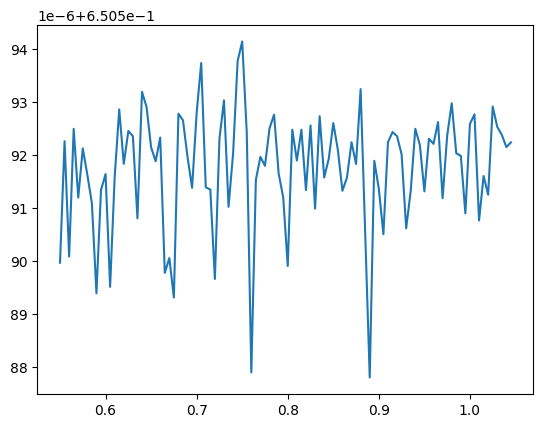

In [44]:
plt.plot(df_out1['alpha'].values, df_out1['auc'].values)

This plot is about the same as our first model, meaning we should continue to expand our lambda values to hopefully reach that peak. It is also notable that the mean AUC are still about the same.

In [45]:
df_out1.sort_values(by='auc', ascending=False).reset_index(drop=True)
df_out1

,alpha,auc
0,0.550,0.650590
1,0.555,0.650592
2,0.560,0.650590
3,0.565,0.650592
4,0.570,0.650591
...,...,...
95,1.025,0.650593
96,1.030,0.650593
97,1.035,0.650592
98,1.040,0.650592


## Final Model

In [46]:
list2 = []
for i in np.arange(1.1, 50, 0.5):
    lasso_modi= LogisticRegression(penalty='l1', C=1/i, solver='liblinear', max_iter=1000)
    test_fold_auc= cross_val_score(lasso_modi, x_full, y_full, cv=k_fold, scoring='roc_auc')
    list2.append([i, test_fold_auc.mean()])
df_out2 = pd.DataFrame(list2, columns=['alpha', 'auc'])
df_out2.head()

,alpha,auc
0,1.1,0.650593
1,1.6,0.650594
2,2.1,0.650593
3,2.6,0.650594
4,3.1,0.650593


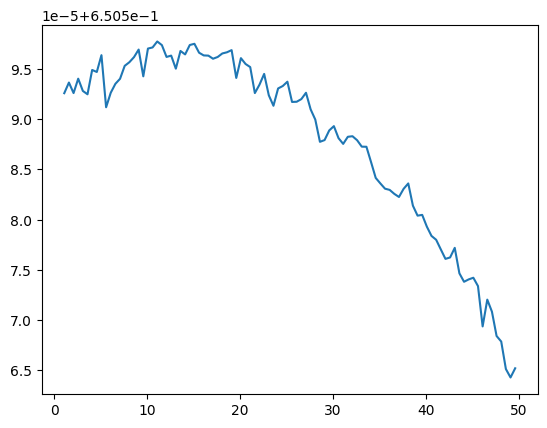

In [47]:
plt.plot(df_out2['alpha'].values, df_out2['auc'].values)

The plot has now shown a "peak" meaning we have found the best lambda value for this model.

In [49]:
df_out2.sort_values(by='auc', ascending=False)
df_out2

,alpha,auc
0,1.1,0.650593
1,1.6,0.650594
2,2.1,0.650593
3,2.6,0.650594
4,3.1,0.650593
...,...,...
93,47.6,0.650568
94,48.1,0.650568
95,48.6,0.650565
96,49.1,0.650564


In [50]:
# Best auc mean
df_out2['auc'].max()

0.6505976948634662

In [51]:
# Corresponding lamba
df_out2[df_out2['auc'] == df_out2['auc'].max()]

,alpha,auc
20,11.1,0.650598


## Analysis
Regardless of whether we increase the alpha values from 1 to approximately 50, we get relatively the same auc curve. Furthermore, we see that all of these model have about the same mean auc, about 0.65. After a few iterations we were able to see a "peak" auc mean in our alpha values to auc mean plot, indicating that we have found the best lambda for our full model. The best auc mean score was 0.650598 with a corresponding lamba value of 11.1. Our models could have been different with another regression type, such as elastic net to find if anything may be overfitting the model, however, that would require further analysis that will not be covered in this report.

## 7. Best Model Discussion

In [52]:
from sklearn.model_selection import train_test_split

## Creates a features matrix and target array for the training and test datasets
df_train, df_test = train_test_split(heart_df, test_size=0.2, random_state=101)
x_train = df_train.drop(['has_heart_disease'], axis=1)
y_train = df_train['has_heart_disease']
x_test = df_test.drop(['has_heart_disease'], axis=1)
y_test = df_test['has_heart_disease']

## Scales the numerical explanatory variables
scaled_train_exp_vars = scaler_training.fit_transform(x_train[['BMI', 'SleepTime']])
scaled_test_exp_vars = scaler_training.transform(x_test[['BMI', 'SleepTime']])
x_train[['BMI', 'SleepTime']] = scaled_train_exp_vars
x_test[['BMI', 'SleepTime']] = scaled_test_exp_vars

## Translates the categorical explanatory variables into indicator variables
cat_train_df = x_train[['Smoking', 'PhysicalActivity', 'AlcoholDrinking']]
num_train_df = x_train[['BMI', 'SleepTime']]
dummies_train = pd.get_dummies(cat_train_df, drop_first=True, dtype=int)
x_train_full = pd.concat([num_train_df, dummies_train], axis=1).reset_index(drop=True)
print(x_train_full.head())

cat_test_df = x_test[['Smoking', 'PhysicalActivity', 'AlcoholDrinking']]
num_test_df = x_test[['BMI', 'SleepTime']]
dummies_test = pd.get_dummies(cat_test_df, drop_first=True, dtype=int)
x_test_full = pd.concat([num_test_df, dummies_test], axis=1).reset_index(drop=True)
x_test_full.head()

        BMI  SleepTime  Smoking_Yes  PhysicalActivity_Yes  AlcoholDrinking_Yes
0 -0.849718   0.626887            0                     1                    1
1  0.621389  -1.461289            0                     0                    0
2  2.292101  -0.765231            0                     0                    0
3 -0.882724   0.626887            0                     1                    0
4 -0.071729  -0.069172            1                     0                    0


,BMI,SleepTime,Smoking_Yes,PhysicalActivity_Yes,AlcoholDrinking_Yes
0,0.404495,-0.069172,1,0,0
1,-0.150314,-0.765231,0,1,0
2,-0.675260,-0.069172,1,1,0
3,0.102729,0.626887,1,1,0
4,-0.046582,-0.069172,0,1,0


In [53]:
## Creates the chosen model from part 6
final_model = LogisticRegression(penalty='l1', C=1/11.1, solver='liblinear', max_iter=1000)
final_model.fit(x_train_full, y_train)
df_final_model = pd.DataFrame({'BMI': final_model.coef_[0][0],
                                'SleepTime': final_model.coef_[0][1],
                                'Smoking_Yes': final_model.coef_[0][2],
                                'PhysicalActivity_Yes': final_model.coef_[0][3],
                                'AlcoholDrinking_Yes': final_model.coef_[0][4],
                                'Intercept': final_model.intercept_[0]}, index=[0])
df_final_model

,BMI,SleepTime,Smoking_Yes,PhysicalActivity_Yes,AlcoholDrinking_Yes,Intercept
0,0.120285,0.04891,0.74597,-0.620807,-0.647646,-2.265415


$\hat {odds\ a\ patient\ has\ heart\ disease}$ = $e^{-2.265415 + (0.120285)*BMI + (0.04891)*SleepTime + (0.74597)*Smoking\_Yes + (-0.620807)*PhysicalActivity\_Yes + (-0.647646)*AlcoholDrinking\_Yes}$

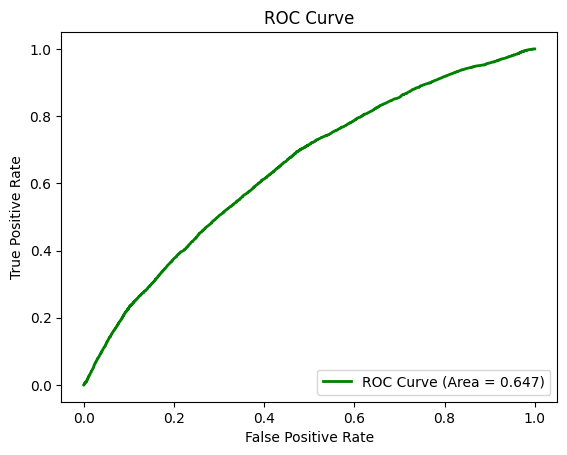

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Predicts the probability of having heart disease for the test dataset
x_test_full.insert(0, 'predictive_prob', final_model.predict_proba(x_test_full)[::,1])

## Creates the ROC curve
fprs, tprs, thresholds = roc_curve(y_true = y_test, y_score = x_test_full['predictive_prob'])
auc = roc_auc_score(y_true = y_test, y_score = x_test_full['predictive_prob'])

plt.plot(fprs, tprs, color = 'green', lw = 2, label = 'ROC Curve (Area = ' + str(round(auc, 3)) + ')')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

In [55]:
## Finds an acceptable threshold for the model
df_ROC = pd.DataFrame({'False Positive Rate': fprs, 'True Positive Rate': tprs, 'Threshold': thresholds})
df_acceptable = df_ROC[df_ROC['True Positive Rate'] >= 0.95]
best = df_acceptable[df_acceptable['False Positive Rate'] == df_acceptable['False Positive Rate'].min()]
best

,False Positive Rate,True Positive Rate,Threshold
13132,0.873805,0.950117,0.048091


The best model's formula was

$\hat {odds\ a\ patient\ has\ heart\ disease}$ = $e^{-2.265415 + (0.120285)*BMI + (0.04891)*SleepTime + (0.74597)*Smoking\_Yes + (-0.620807)*PhysicalActivity\_Yes + (-0.647646)*AlcoholDrinking\_Yes}$

All the variables we studied were included in the final model, though, SleepTime's slope value is very low. Despite the inclusion of all the variables, the model should not have issues with multicollinearity because none of the variables exhibited a strong association with one another per the preliminary analysis. Becuase of this and the fact that the numerical variables were scaled before fitting the model, we are able to interpret the slope's magnitude as being representative of the predictive power of each variable. For instance, whether someone smoked or not was the most important factor in predicting heart disease as its corresponding slope magnitude is 0.74597. AlcoholDrinking and PhysicalActivity also had significant influence on the predictive model while BMI and SleepTime did not.

Despite the various slope magnitudes, none of the variables corresponding slopes had values near 0, indicating that all variables had enough predictive power to be included in the final model. Therefore, the output suggests that none of the variables overfit the predictive model. This said, the model did not perform overly well in predicting heart disease in people given the five explanatory variables. The test ROC curve demonstrates that an increase in the true positive rate comes at the expense of a significant increase in the false positive rate. This means that there is no probability threshhold we can set for the model to have a true positive rate near 1 while also having the false positive rate be near 0. This is supported by the final model's test AUC score of 0.647, which is not very high. In general, the final model does not predict heart disease for the observations well.

Given the overall research goal of accurately predicting heart disease for observations in new datasets, we want to select a probability threshhold the properly balances creating the maximum true positive rate while minimizing the false positive rate. However, as described in the introduction, it is worse for the model to predict an oberservation to not have heart disease when it does than to predict an observation does have heart disease when it does not. Therefore, our true positive rate, the proportion of observations with heart disease that the model properly predicts having heart disease, to be very high to ensure early identification of a problem can occur. We set the minimum true positive rate to be 95% so that around 19 in 20 people with heart disease would properly be identified as having heart disease. We then selected the threshold that yielded the lowest false positive rate while maintaining a true positive rate of 95% in order to achieve a proper balance between the two competing goals of minimizing the false positive rate and maximizing the true positive rate. In the end, the selected probability threshold is 0.048091 with a corresponding true positive rate of 0.950117 and a false positive rate of 0.873805. This means that aproximately 87.4% of people without heart disease are improperly classified as having heart disease and aproximately 95.0% of people with heart disease are properly classified as having heart disease.

## 8. Additional Analysis/Insight

To further study the impacts of each of the explanatory variables on the final model and enhance the research goal of having an interpretable model, we decided to visualize the relationship between each variable and the predicted probability of having heart disease for each observation. This provides greater insight into the strength of the relationship between each of the variables and the model's predicted probability of an observation having heart disease. The visualizations also support another secondary research goal of being able to describe the relationship between each explanatory variable and heart disease.

In [56]:
df_test_results = pd.concat([x_test_full, y_test], axis=1).reset_index(drop=True)
df_test_results.head()


,predictive_prob,BMI,SleepTime,Smoking_Yes,PhysicalActivity_Yes,AlcoholDrinking_Yes,has_heart_disease
0,0.186309,0.404495,-0.069172,1.0,0.0,0.0,NaN
1,0.050129,-0.150314,-0.765231,0.0,1.0,0.0,NaN
2,0.097540,-0.675260,-0.069172,1.0,1.0,0.0,NaN
3,0.109366,0.102729,0.626887,1.0,1.0,0.0,NaN
4,0.052391,-0.046582,-0.069172,0.0,1.0,0.0,NaN


<AxesSubplot: xlabel='Smoking_Yes', ylabel='predictive_prob'>

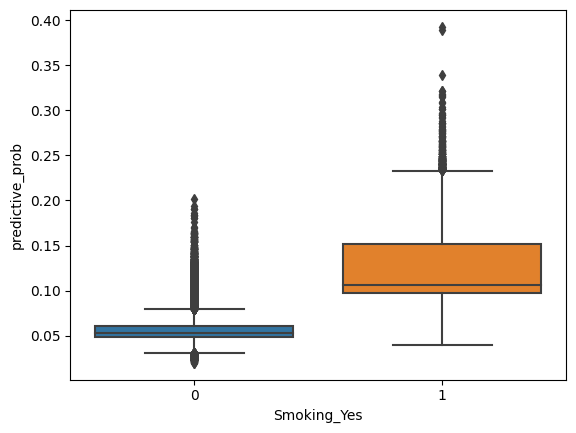

In [57]:
sns.boxplot(x = 'Smoking_Yes', y = 'predictive_prob', data = x_test_full)

<AxesSubplot: xlabel='PhysicalActivity_Yes', ylabel='predictive_prob'>

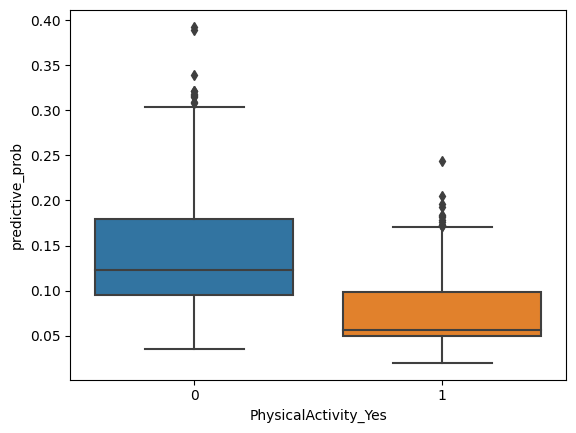

In [58]:
sns.boxplot(x = 'PhysicalActivity_Yes', y = 'predictive_prob', data = x_test_full)

<AxesSubplot: xlabel='AlcoholDrinking_Yes', ylabel='predictive_prob'>

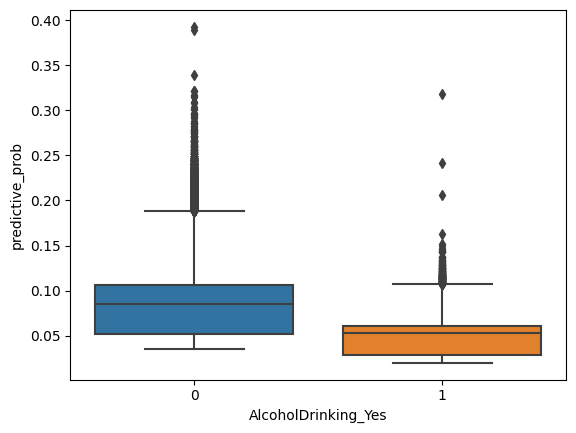

In [59]:
sns.boxplot(x = 'AlcoholDrinking_Yes', y = 'predictive_prob', data = x_test_full)

<AxesSubplot: xlabel='BMI', ylabel='predictive_prob'>

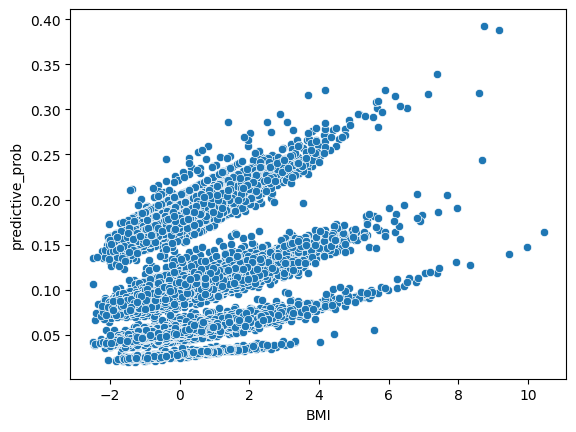

In [60]:
sns.scatterplot(x = "BMI", y = 'predictive_prob', data = x_test_full)

<AxesSubplot: xlabel='SleepTime', ylabel='predictive_prob'>

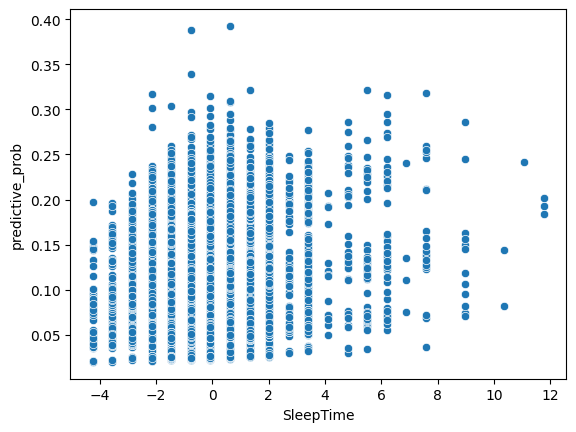

In [61]:
sns.scatterplot(x = "SleepTime", y = 'predictive_prob', data = x_test_full)

While most visualizations did not yield much greater insight into how the variables seemed to impact the model, we did observe an interesting relationship between BMI and the model's predicted probability of an observation having heart disease. Four distinct clsuters of data emerged when examining BMI and the model's predicted probability: in the lower cluster, increasing BMI seems to have a lesser impact on increasing the predicted probability of having heart disease compared to the higher clusters where the slope seems to be greater.

The visualizations also confirmed the strong impact of the categorical explanatory variables on the model's predictive probabilities, as the overlap between each of the indicator variables' boxplots when examining the model's predicitive probabilities was very little, indicating a strong relationship between the categorical variables and the predictive probability. While this was expected because of the high slope values in the final model's equation, it is interesting to see confirmation of this fact with the visualizations since the model's overall ability to categorize an observation as having heart disease or not having heart disease was very poor. It appears that the weakness of the numeric variables' predictive power heavily impeded us from creating a successful logistic regression model that accurately predicts whether new observations have heart disease.

## 9. Conclusion

In all, we would not recommend our model be used for predicting whether someone has heart disease. The test AUC of the final model was 0.647, which is not much better than the realistic worse-case scenario of an AUC of 0.500. The test ROC curve also demonstrated that there was not predictive probability threshold that we could use such that the false positive rate would be close to zero while the true positive rate be close to 1. Additionally, while the true positive rate for our final model was around 95%, this came at the significant cost of accuracy for the false positive rate. The model is too inaccurate to use, especially in medical settings where accuracy is key to helping diagnose and treat serious illness like heart disease.

This said, we can not be sure that our chosen model would have yielded the highest test AUC score of all possible logistic regression models given the five explanatory variables, as our selection algorithm is not guarenteed to produce the best model. We could have also produced a ridge regression model or used a backward elimination algorithm to help find another good model that may have yielded an even higher average AUC. Some other shortcomings of our analysis include the exclusion of other variables in the dataset. We did not examine the relationship between heart disease and sex, race, diabaetic status, and much more. Future research should look into other variables in the dataset we did not explore to see if there are even better explanatory variables capable of creating a better predictive model. Other research could also examine the possible relationship observed in our post-analysis of the different relationships between BMI and predicitive probability when predictive probability is already comparitively high.

## References

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4389712/ 

https://journalofethics.ama-assn.org/article/what-makes-screening-exam-good/2006-01